Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Load the data sets- train and test 
df = pd.read_csv('train_titanic.csv')

In [8]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# -ksv:  handing of the null and the missing vales
df.isnull().sum()

In [17]:

x = df.drop(columns=['Survived'])
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
#Print the dimension of train and test data

( (x.shape,y.shape) ), (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(((891, 11), (891,)), ((668, 11), (223, 11), (668,), (223,)))

In [26]:
#Print the number of missing values in each column of train and test data
print("Train follwed by test")
(x_train.isnull().sum(),y_train.isnull().sum() ), (x_test.isnull().sum(),y_test.isnull().sum())


Train follwed by test


((PassengerId      0
  Pclass           0
  Name             0
  Sex              0
  Age            138
  SibSp            0
  Parch            0
  Ticket           0
  Fare             0
  Cabin          511
  Embarked         1
  dtype: int64,
  0),
 (PassengerId      0
  Pclass           0
  Name             0
  Sex              0
  Age             39
  SibSp            0
  Parch            0
  Ticket           0
  Fare             0
  Cabin          176
  Embarked         1
  dtype: int64,
  0))

## Data Visualization

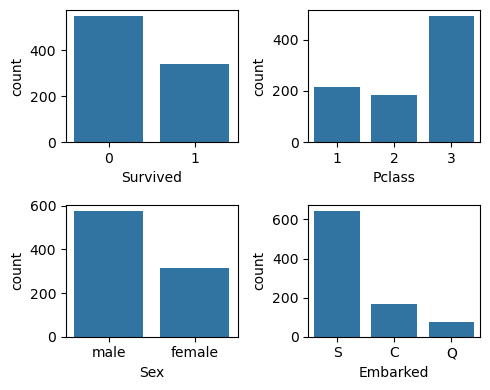

In [48]:
#Barchart of Survived, Pclass, Sex, Embarked

cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axis = plt.subplots(2,2,figsize=(5,4))
axis = axis.flatten()
for i,col in enumerate(cols):
  cur_ax = axis[i]
  sns.countplot(data = df,x=col,ax=cur_ax)
plt.tight_layout()
plt.show()

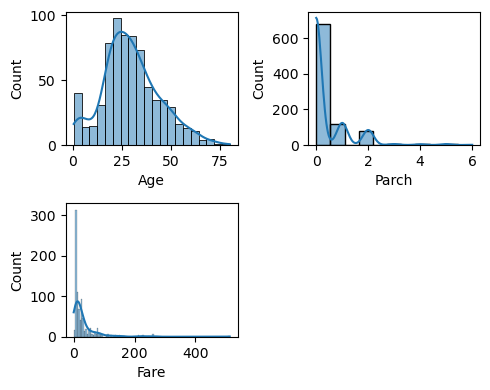

In [63]:
#Histogram of Age, Parch, Fare
import matplotlib.pyplot as plt

cols = ['Age', 'Parch', 'Fare']

fig, axis = plt.subplots(2,2,figsize=(5,4))
axis = axis.flatten()
for i,col in enumerate(cols):
  sns.histplot(data=df,x = col,ax=axis[i],kde=True)

plt.delaxes(axis[3])
plt.tight_layout()
plt.show()


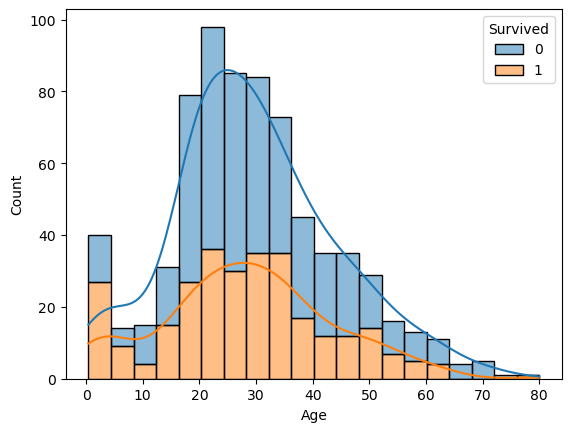

In [80]:
# #Plot histogram of age for survived and did not survived class

sns.histplot(data=df,x = 'Age',hue='Survived',multiple='stack',kde=True)
plt.show()


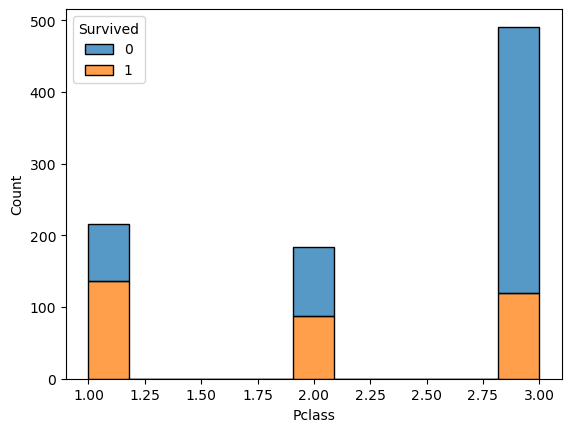

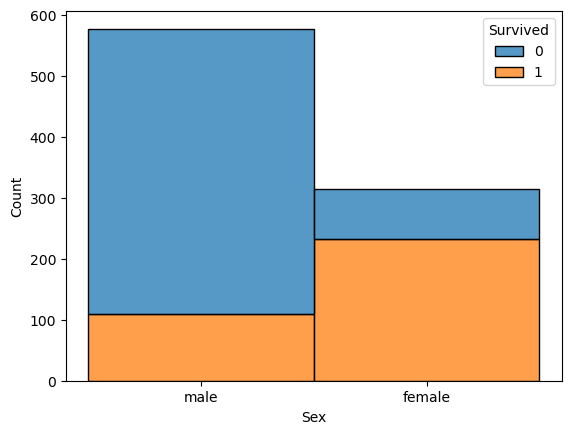

<Figure size 640x480 with 0 Axes>

In [89]:
#Count class and gender wise survival rate - plot with appropriate char
import matplotlib.pyplot as plt
for col in ['Pclass','Sex']:
  sns.histplot(data=df,x=col,hue='Survived',multiple='stack')
  plt.show()
plt.tight_layout()
plt.show()
#Age wise Distribution of Male and Female passengers

<Axes: xlabel='Age', ylabel='Count'>

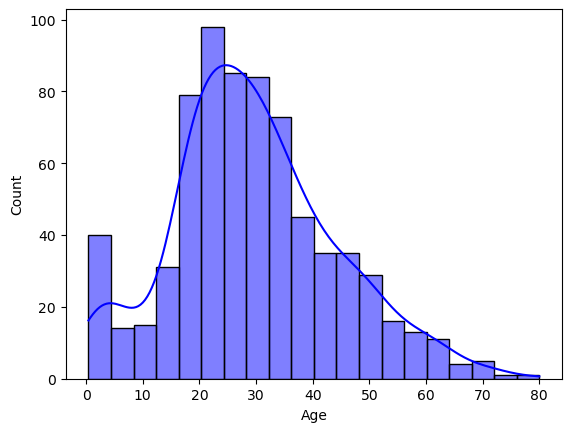

In [100]:
#Histogram of Age of the given data set(sample)

sns.histplot(data=df,x = 'Age',kde=True,color='blue',bins=20)

## Handling Missing Values

In [ ]:
#Replace the mising values in Embarked column by 'S'
cols = [col for col in df.columns if col.lower().startswith('s')]

print(df[cols].isnull().sum())


for col in cols:
  if(df[col].dtype == 'object'):
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
  else:
    df[col] = df[col].fillna(df[col].mean())



Survived    0
Sex         0
SibSp       0
dtype: int64


In [ ]:
#Impute the missing values in Fare column with median value

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

14.4542

In [17]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

## Feature Engineering - Creating new features

In [19]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

In [20]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [22]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

## Model Building

In [24]:
#Prepare X and y

In [ ]:
# Label encoding of categorical features


In [ ]:
# concat df_categorical with original df

In [ ]:
#Do a pairplot of all features

In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation


In [ ]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

In [ ]:
#Print the tree

# Importing required packages for visualization


In [ ]:
# plotting tree with max_depth=3

<img src="tree2.png">

In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [ ]:
# Printing confusion matrix and accuracy